In [1]:
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
import pandas as pd

instant_max = 5
font_path = "./chinese.simhei.ttf"


PATH = "zh2year"
filename = open("zhyearbook") 
top_30_all_time = []
df = pd.DataFrame({"year": [], "zh": [], "freq": [], "percentile": []})
for line in tqdm(filename):
    year = os.path.join(PATH, line.strip("\n"))

    
    DICT = np.load(year).item()
    DICT = dict(sorted(DICT.items(), key = lambda x:x[1], reverse = True))
    
    del_list = ["百元以下罰金", "得為證據", "事實欄", "刑法第三百零九條", "死者", "發生口角", "施強暴", 
               "證明力", "破", "消", "訴訟程序", "人證", "那個", '侮辱', '有', '對', '他', '你', '我', '警察'
               , '小', '好', '來', '和解', '打', '看', '警員', '走', '老', '誹謗', '妳', '認識', '哪', '假', 
               '先生', '下來', '吃', '喝', '真的', '三字經', '強暴', '吐口水', '發', '男女', '之強暴方式', '厚', 
               '要找', '出去']
    for j in del_list:
        if(j in DICT.keys()):
            del(DICT[j])
    # print(DICT)
    keys = list(DICT.keys())
    values = list(DICT.values())
   
    if(len(keys) > instant_max):
        keys, values = keys[0:instant_max], values[0:instant_max]
    
    percentile = [round(i / sum(values) * 100, 1) for i in values]
    top_30_all_time.append([int(line.split("th")[0]), keys, values, percentile])
    accumulated_percentile = [sum(percentile[i: -1]) for i in range(len(percentile))]
    df = df.append(pd.DataFrame(
        {"year": line.split("th")[0], "zh": keys, "freq": values, "percentile": percentile, "Acc_per": accumulated_percentile}))
    df = df.reset_index(drop = True)
df = df.reset_index(drop = True)
# print(top_30_all_time)
print(df)
# print(df['zh'])

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)



     Acc_per    freq  percentile year   zh
0       91.8   952.0        33.1  100  幹你娘
1       58.7   757.0        26.3  100    幹
2       32.4   540.0        18.8  100    死
3       13.6   391.0        13.6  100   機車
4        0.0   234.0         8.1  100  不要臉
5       92.2  1177.0        34.3  101  幹你娘
6       57.9   958.0        27.9  101    幹
7       30.0   577.0        16.8  101    死
8       13.2   452.0        13.2  101   機車
9        0.0   266.0         7.8  101   你娘
10      91.7  1129.0        34.3  102  幹你娘
11      57.4   882.0        26.8  102    幹
12      30.6   535.0        16.2  102    死
13      14.4   474.0        14.4  102   機車
14       0.0   273.0         8.3  102    靠
15      90.6  1154.0        33.4  103  幹你娘
16      57.2   979.0        28.4  103    幹
17      28.8   553.0        16.0  103    死
18      12.8   442.0        12.8  103   機車
19       0.0   322.0         9.3  103   你娘
20      90.0  1160.0        33.5  104  幹你娘
21      56.5   948.0        27.4  104    幹
22      29

In [2]:
# df2 = pd.DataFrame({'zh': df['zh'], 'percentile': df['percentile']})
time_dict = dict()
year_list = []
for i in df['zh']:
    if(i not in time_dict):
        time_dict[i] = []
# print(top_30_all_time)

from operator import itemgetter
first_item = itemgetter(0)
top_30_all_time = sorted(top_30_all_time, key = first_item)
for i in top_30_all_time:
    for j in time_dict.keys():
        if(j in i[1]):
            time_dict[j].append(i[3][i[1].index(j)])
        else:
            time_dict[j].append(0)

# print(time_dict)


# print(df2)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname = font_path)
font = fm.FontProperties(fname=font_path)  # speicify font
df2 = pd.DataFrame(time_dict)

ax = df2.plot.barh(stacked = True, colormap='tab20')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

labels = ax.get_xticklabels()+ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)).texts+[ax.title]
for label in labels : 
    label.set_fontproperties(font) 
    
vals = ax.get_yticks()
ax.set_yticklabels([x + 85 for x in vals])

vals = ax.get_xticks()
ax.set_xticklabels([str(x) + '%' for x in vals])



# ax = df2.plot(kind = 'barh', rot = 0)
plt.ylabel("民國年份", fontproperties = prop)
plt.title("髒話年份演進", fontproperties = prop)
plt.show()
#for label in ax.get_xticklabels() : 
#    label.set_fontproperties(font) 
#plt.show()
ax = ax.get_figure()

# ax.savefig('髒話年份演進圖', dpi=300, fontproperties = prop, bbox_inches='tight')

<Figure size 640x480 with 1 Axes>

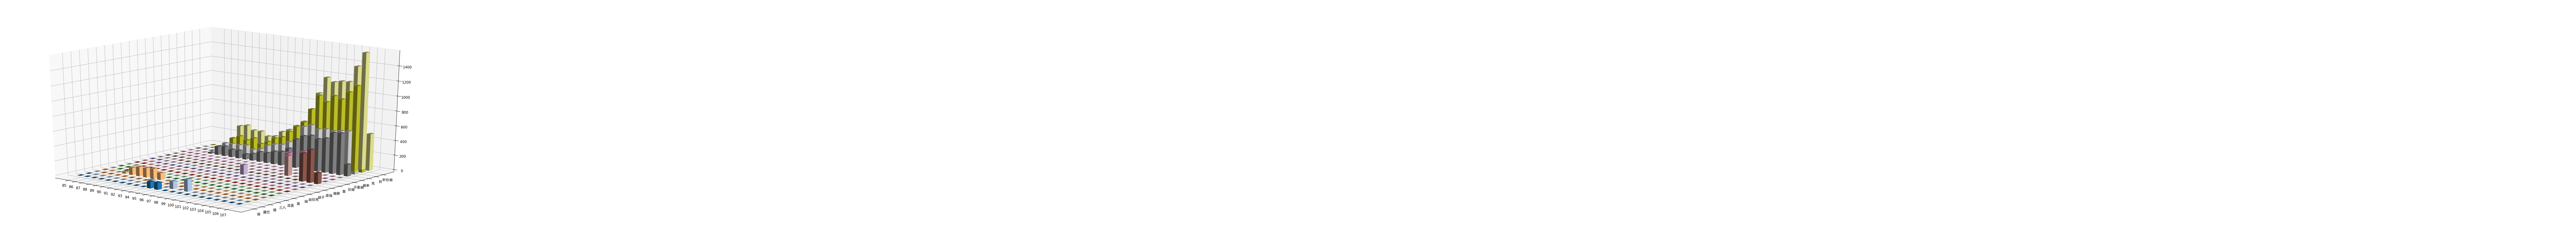

In [8]:
# print(top_30_all_time)
frequencies = []

time_dict = dict()
year_list = []
for i in df['zh']:
    if(i not in time_dict):
        time_dict[i] = []
# print(top_30_all_time)

from operator import itemgetter
first_item = itemgetter(0)
top_30_all_time = sorted(top_30_all_time, key = first_item)
for i in top_30_all_time:
    for j in time_dict.keys():
        if(j in i[1]):
            time_dict[j].append(i[2][i[1].index(j)])
        else:
            time_dict[j].append(0)

for i in time_dict.keys():
    frequencies.append(time_dict[i])
zh = list(time_dict.keys())
year = [i for i in range(85, 108)]

# 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

result = frequencies[::-1]#
result = np.array(result, dtype=np.int)

fig=plt.figure(figsize=(22, 12), dpi=150)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(['10/11/2013', '10/12/2013', '10/13/2013',
                    '10/14/2013', '10/15/2013'])
xlabels = np.array(year)#
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['A1','C1','G1','M1','M2','M3','P1'])
ylabels = np.array(zh[::-1])#
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)
# ax1.w_yaxis.set_label_coords(0, 10)

temp = ax1.w_yaxis.get_ticklabels()
for i in temp:
    i.set_fontproperties(font) 

values = np.linspace(0.0, 0.89, xposM.ravel().shape[0])
# print(values)
colors = cm.tab20(values)
# print(colors)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
ax1.view_init(20, -50)
# plt.show()
plt.savefig('3d髒話年份演進圖', dpi = 300, fontproperties = prop)